In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from fuzzywuzzy import process
import seaborn as sns

C:\Users\Mila\PycharmProjects\VNP\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
recipe = pd.read_csv('1k.csv')
recipe

,id,title,url,ingredients,instructions,tags
0,000018c8a5,Worlds Best Mac and Cheese,http://www.epicurious.com/recipes/food/views/-...,"[{""unit"":""ounces"",""quantity"":""6"",""name"":""penne...","[""Preheat the oven to 350 F. Butter or oil an ...",[]
1,000033e39b,Dilly Macaroni Salad Recipe,http://cookeatshare.com/recipes/dilly-macaroni...,"[{""unit"":""c."",""quantity"":""1"",""name"":""elbow mac...","[""Cook macaroni according to package direction...",[]
2,000035f7ed,Gazpacho,http://www.foodnetwork.com/recipes/gazpacho1.html,"[{""unit"":"""",""quantity"":""8"",""name"":""tomatoes""},...","[""Add the tomatoes to a food processor with a ...",[]
3,00003a70b1,Crunchy Onion Potato Bake,http://www.food.com/recipe/crunchy-onion-potat...,"[{""unit"":""cups"",""quantity"":""2 1/2"",""name"":""mil...","[""Preheat oven to 350 degrees Fahrenheit."",""Sp...",[]
4,00004320bb,Cool 'n Easy Creamy Watermelon Pie,http://www.food.com/recipe/cool-n-easy-creamy-...,"[{""unit"":""package"",""quantity"":""1"",""name"":""wate...","[""Dissolve Jello in boiling water."",""Allow to ...",[]
...,...,...,...,...,...,...
99995,18c5ff5968,Crispy chicken salad,https://cookpad.com/us/recipes/358624-crispy-c...,"[{""unit"":"""",""quantity"":""1"",""name"":""lettuce""},{...","[""Cut all ingriedients to personal size"",""Add ...",[]
99996,18c6060eb7,Double Jack Stew,http://www.foodnetwork.com/recipes/guy-fieri/d...,"[{""unit"":"""",""quantity"":""3"",""name"":""hanger stea...","[""Pair this hearty stew with a dry Irish stout...",[]
99997,18c606f28e,Blondie's Dad's Take Me Out To The Ballgame Mi...,https://cookpad.com/us/recipes/364329-blondies...,"[{""unit"":""tbsp"",""quantity"":""1"",""name"":""unsalte...","[""Position an oven rack in the center of the o...",[]
99998,18c6112dda,Chocolate Mousse Cake Recipe chowser,http://www.chowhound.com/recipes/chocolate-mou...,"[{""unit"":""c."",""quantity"":""1 3/4"",""name"":""hazel...","[""Butter 9\"" springform pan."",""Process nuts in...",[]


In [3]:
recipe.drop(['url', 'instructions', 'tags'], axis=1)    

,id,title,ingredients
0,000018c8a5,Worlds Best Mac and Cheese,"[{""unit"":""ounces"",""quantity"":""6"",""name"":""penne..."
1,000033e39b,Dilly Macaroni Salad Recipe,"[{""unit"":""c."",""quantity"":""1"",""name"":""elbow mac..."
2,000035f7ed,Gazpacho,"[{""unit"":"""",""quantity"":""8"",""name"":""tomatoes""},..."
3,00003a70b1,Crunchy Onion Potato Bake,"[{""unit"":""cups"",""quantity"":""2 1/2"",""name"":""mil..."
4,00004320bb,Cool 'n Easy Creamy Watermelon Pie,"[{""unit"":""package"",""quantity"":""1"",""name"":""wate..."
...,...,...,...
99995,18c5ff5968,Crispy chicken salad,"[{""unit"":"""",""quantity"":""1"",""name"":""lettuce""},{..."
99996,18c6060eb7,Double Jack Stew,"[{""unit"":"""",""quantity"":""3"",""name"":""hanger stea..."
99997,18c606f28e,Blondie's Dad's Take Me Out To The Ballgame Mi...,"[{""unit"":""tbsp"",""quantity"":""1"",""name"":""unsalte..."
99998,18c6112dda,Chocolate Mousse Cake Recipe chowser,"[{""unit"":""c."",""quantity"":""1 3/4"",""name"":""hazel..."


In [4]:
food = pd.read_csv('food.csv')
food

,fdc_id,data_type,description,food_category_id,publication_date
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
3,319877,sub_sample_food,Hummus,16.0,2019-04-01
4,319878,sub_sample_food,Hummus,16.0,2019-04-01
...,...,...,...,...,...
63970,2687758,sub_sample_food,"tomato, puree, canned, salt added",11.0,2024-04-18
63971,2687759,sub_sample_food,"tomato, puree, canned, salt added",11.0,2024-04-18
63972,2687760,sub_sample_food,"tomato, puree, canned, no salt added",11.0,2024-04-18
63973,2687761,sub_sample_food,"tomato, puree, canned, no salt added",11.0,2024-04-18


In [5]:
nutrient = pd.read_csv('food_nutrient_conversion_factor.csv')
nutrient

,id,fdc_id
0,22721,746952
1,22722,747429
2,22723,747693
3,22724,749420
4,22725,789890
...,...,...
11365,23117,2685578
11366,23118,2685579
11367,23119,2685580
11368,23120,2685581


In [6]:
macro = pd.read_csv('food_calorie_conversion_factor.csv')
macro

,food_nutrient_conversion_factor_id,protein_value,fat_value,carbohydrate_value
0,22503,3.47,8.37,4.07
1,22505,4.27,8.79,3.87
2,22507,2.44,8.37,3.57
3,22510,2.44,8.37,3.57
4,22512,2.44,8.37,3.57
...,...,...,...,...
307,23102,2.44,8.37,3.57
308,23103,2.44,8.37,3.57
309,23104,2.44,8.37,3.57
310,23105,2.44,8.37,3.57


In [7]:
food_nutrient = pd.merge(food, nutrient, on='fdc_id', how='inner')
food_nutrient

,fdc_id,data_type,description,food_category_id,publication_date,id
0,321358,foundation_food,"Hummus, commercial",16.0,2019-04-01,22503
1,321358,foundation_food,"Hummus, commercial",16.0,2019-04-01,22504
2,321359,foundation_food,"Milk, reduced fat, fluid, 2% milkfat, with add...",1.0,2019-04-01,22505
3,321359,foundation_food,"Milk, reduced fat, fluid, 2% milkfat, with add...",1.0,2019-04-01,22506
4,321360,foundation_food,"Tomatoes, grape, raw",11.0,2019-04-01,22507
...,...,...,...,...,...,...
595,2685580,foundation_food,"Tomato, paste, canned, without salt added",11.0,2024-04-18,23119
596,2685581,foundation_food,"Tomatoes, crushed, canned",11.0,2024-04-18,23105
597,2685581,foundation_food,"Tomatoes, crushed, canned",11.0,2024-04-18,23120
598,2685582,foundation_food,"Tomato, puree, canned",11.0,2024-04-18,23106


In [8]:
food_nutrient_macro = pd.merge(food_nutrient, macro, left_on='id', right_on='food_nutrient_conversion_factor_id', how='inner')
food_nutrient_macro

,fdc_id,data_type,description,food_category_id,publication_date,id,food_nutrient_conversion_factor_id,protein_value,fat_value,carbohydrate_value
0,321358,foundation_food,"Hummus, commercial",16.0,2019-04-01,22503,22503,3.47,8.37,4.07
1,321359,foundation_food,"Milk, reduced fat, fluid, 2% milkfat, with add...",1.0,2019-04-01,22505,22505,4.27,8.79,3.87
2,321360,foundation_food,"Tomatoes, grape, raw",11.0,2019-04-01,22507,22507,2.44,8.37,3.57
3,321611,foundation_food,"Beans, snap, green, canned, regular pack, drai...",11.0,2019-04-01,22510,22510,2.44,8.37,3.57
4,321900,foundation_food,"Broccoli, raw",11.0,2019-04-01,22512,22512,2.44,8.37,3.57
...,...,...,...,...,...,...,...,...,...,...
307,2685578,foundation_food,"Tomatoes, whole, canned, solids and liquids, w...",11.0,2024-04-18,23102,23102,2.44,8.37,3.57
308,2685579,foundation_food,"Tomato, sauce, canned, with salt added",11.0,2024-04-18,23103,23103,2.44,8.37,3.57
309,2685580,foundation_food,"Tomato, paste, canned, without salt added",11.0,2024-04-18,23104,23104,2.44,8.37,3.57
310,2685581,foundation_food,"Tomatoes, crushed, canned",11.0,2024-04-18,23105,23105,2.44,8.37,3.57


In [9]:
food_nutrient_macro['description'] = food_nutrient_macro['description'].str.split().str[0]
food_nutrient_macro['description'] = food_nutrient_macro['description'].str.replace(',', '', regex=False)
food_nutrient_macro

,fdc_id,data_type,description,food_category_id,publication_date,id,food_nutrient_conversion_factor_id,protein_value,fat_value,carbohydrate_value
0,321358,foundation_food,Hummus,16.0,2019-04-01,22503,22503,3.47,8.37,4.07
1,321359,foundation_food,Milk,1.0,2019-04-01,22505,22505,4.27,8.79,3.87
2,321360,foundation_food,Tomatoes,11.0,2019-04-01,22507,22507,2.44,8.37,3.57
3,321611,foundation_food,Beans,11.0,2019-04-01,22510,22510,2.44,8.37,3.57
4,321900,foundation_food,Broccoli,11.0,2019-04-01,22512,22512,2.44,8.37,3.57
...,...,...,...,...,...,...,...,...,...,...
307,2685578,foundation_food,Tomatoes,11.0,2024-04-18,23102,23102,2.44,8.37,3.57
308,2685579,foundation_food,Tomato,11.0,2024-04-18,23103,23103,2.44,8.37,3.57
309,2685580,foundation_food,Tomato,11.0,2024-04-18,23104,23104,2.44,8.37,3.57
310,2685581,foundation_food,Tomatoes,11.0,2024-04-18,23105,23105,2.44,8.37,3.57


In [10]:
df=food_nutrient_macro.drop(['fdc_id', 'data_type'],  axis=1).drop_duplicates('description')
df

,description,food_category_id,publication_date,id,food_nutrient_conversion_factor_id,protein_value,fat_value,carbohydrate_value
0,Hummus,16.0,2019-04-01,22503,22503,3.47,8.37,4.07
1,Milk,1.0,2019-04-01,22505,22505,4.27,8.79,3.87
2,Tomatoes,11.0,2019-04-01,22507,22507,2.44,8.37,3.57
3,Beans,11.0,2019-04-01,22510,22510,2.44,8.37,3.57
4,Broccoli,11.0,2019-04-01,22512,22512,2.44,8.37,3.57
...,...,...,...,...,...,...,...,...
302,Cauliflower,11.0,2024-04-18,23097,23097,2.44,8.37,3.57
303,Collards,11.0,2024-04-18,23098,23098,2.44,8.37,3.57
304,Brussels,11.0,2024-04-18,23099,23099,2.44,8.37,3.57
305,Beets,11.0,2024-04-18,23100,23100,2.78,8.37,3.84


In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['protein_value', 'fat_value', 'carbohydrate_value']])

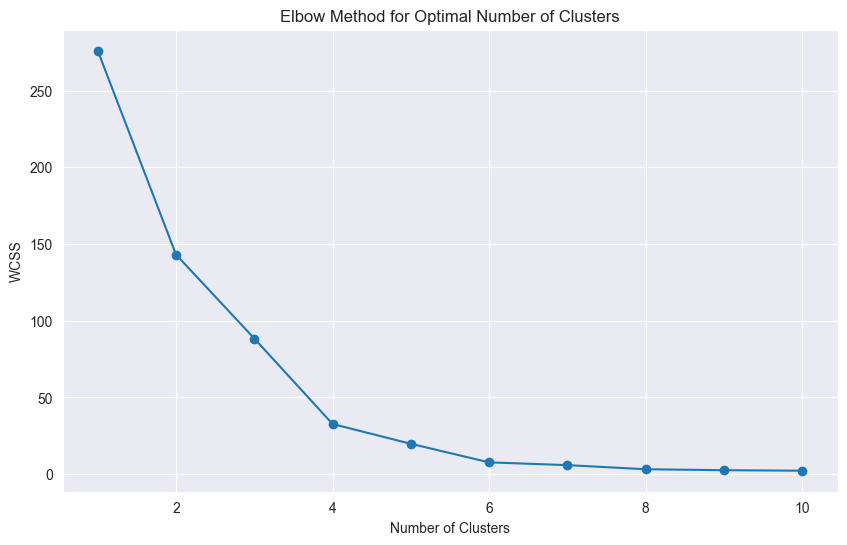

In [12]:
wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_
print(df)

     description  food_category_id publication_date     id  \
0         Hummus              16.0       2019-04-01  22503   
1           Milk               1.0       2019-04-01  22505   
2       Tomatoes              11.0       2019-04-01  22507   
3          Beans              11.0       2019-04-01  22510   
4       Broccoli              11.0       2019-04-01  22512   
..           ...               ...              ...    ...   
302  Cauliflower              11.0       2024-04-18  23097   
303     Collards              11.0       2024-04-18  23098   
304     Brussels              11.0       2024-04-18  23099   
305        Beets              11.0       2024-04-18  23100   
306     Eggplant              11.0       2024-04-18  23101   

     food_nutrient_conversion_factor_id  protein_value  fat_value  \
0                                 22503           3.47       8.37   
1                                 22505           4.27       8.79   
2                                 22507         

In [14]:
for cluster in range(k):
    print(f"\nFoods in Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['description'].tolist())


Foods in Cluster 0:
['Peaches', 'Mustard', 'Figs', 'Kiwifruit', 'Melons', 'Nectarines', 'Oranges', 'Strawberries', 'Pears', 'Olives', 'Bananas', 'Apples', 'Raspberries', 'Blueberries', 'Grapes', 'Applesauce', 'Pineapple', 'Cherries', 'Buckwheat']

Foods in Cluster 1:
['Oat']

Foods in Cluster 2:
['Milk', 'Frankfurter', 'Cheese', 'Egg', 'Sausage', 'Bread', 'Yogurt', 'Turkey', 'Chicken', 'Ham', 'Cookies', 'Fish', 'Restaurant', 'Beef', 'Eggs', 'Pork', 'Flour', 'Soy', 'Almond', 'Buttermilk', 'Cottage', 'Cream', 'Crustaceans']

Foods in Cluster 3:
['Sugars']

Foods in Cluster 4:
['Tomatoes', 'Beans', 'Broccoli', 'Kale', 'Sauce', 'Pickles', 'Carrots', 'Lettuce', 'Ketchup', 'Garlic', 'Onions', 'Mushroom', 'Mushrooms', 'Spinach', 'Tomato', 'Peppers', 'Celery', 'Cucumber', 'Cabbage', 'Squash', 'Cauliflower', 'Collards', 'Brussels', 'Beets', 'Eggplant']

Foods in Cluster 5:
['Hummus', 'Nuts', 'Onion', 'Peanut', 'Grapefruit', 'Seeds', 'Oil', 'Apple', 'Orange', 'Grape', 'Cranberry', 'Sesame', 'Fl

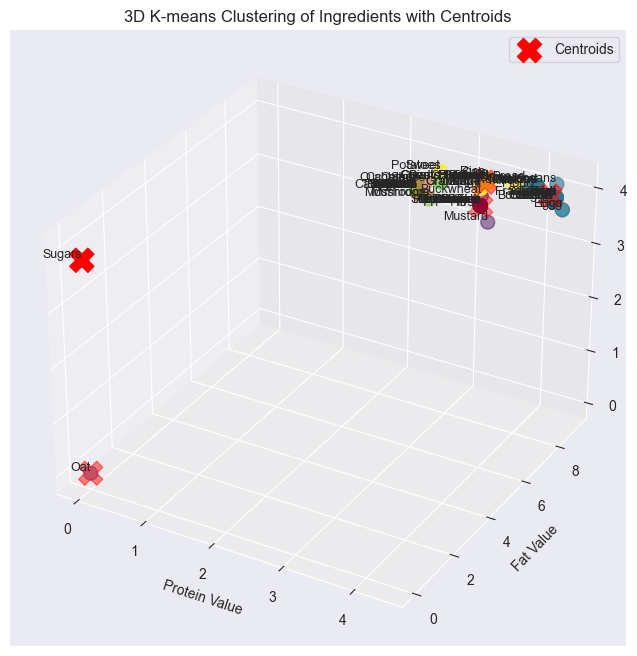

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['protein_value'], df['fat_value'], df['carbohydrate_value'], c=df['cluster'], cmap='viridis', s=100)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')

for i in range(df.shape[0]):
    ax.text(df['protein_value'].iloc[i], df['fat_value'].iloc[i], df['carbohydrate_value'].iloc[i],
            df['description'].iloc[i], fontsize=9, ha='right', va='bottom')

ax.set_xlabel('Protein Value')
ax.set_ylabel('Fat Value')
ax.set_zlabel('Carbohydrate Value')
ax.set_title('3D K-means Clustering of Ingredients with Centroids')
ax.legend(loc='best')
plt.show()

In [16]:
def extract_ingredient_names(json_str):
    ingredients = json.loads(json_str)
    return [ingredient['name'] for ingredient in ingredients]

ingredient_names = recipe['ingredients'].apply(extract_ingredient_names).explode().unique()

ingredient_df = pd.DataFrame(ingredient_names, columns=['name'])

ingredient_df.to_csv('ingredients.csv', index=False)

ingredient_df

,name
0,penne
1,cheese sauce
2,cheddar cheese
3,gruyere cheese
4,dried chipotle powder
...,...
11460,caesar - flavor croutons
11461,tape
11462,galanga powder
11463,pina colada concentrate


In [17]:
clusters = {
    0: ['Peaches', 'Mustard', 'Figs', 'Kiwifruit', 'Melons', 'Nectarines', 'Oranges', 'Strawberries', 'Pears', 'Olives', 'Bananas', 'Apples', 'Raspberries', 'Blueberries', 'Grapes', 'Applesauce', 'Pineapple', 'Cherries', 'Buckwheat'],
    1: ['Oat'],
    2: ['Milk', 'Frankfurter', 'Cheese', 'Egg', 'Sausage', 'Bread', 'Yogurt', 'Turkey', 'Chicken', 'Ham', 'Cookies', 'Fish', 'Restaurant', 'Beef', 'Eggs', 'Pork', 'Flour', 'Soy', 'Almond', 'Buttermilk', 'Cottage', 'Cream', 'Crustaceans'],
    3: ['Sugars'],
    4: ['Tomatoes', 'Beans', 'Broccoli', 'Kale', 'Sauce', 'Pickles', 'Carrots', 'Lettuce', 'Ketchup', 'Garlic', 'Onions', 'Mushroom', 'Mushrooms', 'Spinach', 'Tomato', 'Peppers', 'Celery', 'Cucumber', 'Cabbage', 'Squash', 'Cauliflower', 'Collards', 'Brussels', 'Beets', 'Eggplant'],
    5: ['Hummus', 'Nuts', 'Onion', 'Peanut', 'Grapefruit', 'Seeds', 'Oil', 'Apple', 'Orange', 'Grape', 'Cranberry', 'Sesame', 'Flaxseed', 'Oats', 'Potatoes', 'Sweet', 'Millet', 'Rice', 'Peanuts', 'Chickpeas', 'Lentils', 'Blackeye', 'Peas']
}

for cluster_id in clusters:
    clusters[cluster_id] = [food.lower().strip() for food in clusters[cluster_id]]

substitutes = pd.DataFrame({
    'ingredient': ['Peaches', 'Milk', 'Onion', 'Peanut', 'Tomatoes'],
    'substitute': ['Apricots', 'Cream', 'Leeks', 'Almonds', 'Cherry Tomatoes']
})

substitutes['ingredient'] = substitutes['ingredient'].str.lower().str.strip()
substitutes['substitute'] = substitutes['substitute'].str.lower().str.strip()

ingredient_df['name'] = ingredient_df['name'].fillna('').str.lower().str.strip()

def find_best_cluster_match(ingredient, clusters):
    if ingredient == '':
        return None, None
    best_match = None
    best_cluster = None
    highest_score = 0
    for cluster_id, foods in clusters.items():
        match = process.extractOne(ingredient, foods)
        if match and match[1] > highest_score:
            best_match = match[0]
            highest_score = match[1]
            best_cluster = cluster_id
    return best_cluster, best_match

ingredient_df[['cluster', 'best_match']] = ingredient_df.apply(lambda row: find_best_cluster_match(row['name'], clusters), axis=1, result_type='expand')

def find_substitutes(ingredient, cluster_id, substitutes):
    if ingredient == '':
        return None
    # Get all substitutes for the cluster's foods
    cluster_foods = clusters[cluster_id]
    cluster_substitutes = substitutes[substitutes['ingredient'].isin(cluster_foods)]
    best_substitute = process.extractOne(ingredient, cluster_substitutes['substitute'])
    if best_substitute:
        return best_substitute[0]
    return None

ingredient_df['substitute'] = ingredient_df.apply(lambda row: find_substitutes(row['name'], row['cluster'], substitutes), axis=1)

cluster_summary = ingredient_df[['name', 'cluster', 'best_match', 'substitute']]

cluster_summary

,name,cluster,best_match,substitute
0,penne,5.0,peanut,leeks
1,cheese sauce,2.0,cheese,cream
2,cheddar cheese,2.0,cheese,cream
3,gruyere cheese,2.0,cheese,cream
4,dried chipotle powder,5.0,rice,leeks
...,...,...,...,...
11460,caesar - flavor croutons,1.0,oat,None
11461,tape,0.0,grapes,apricots
11462,galanga powder,4.0,cauliflower,cherry tomatoes
11463,pina colada concentrate,4.0,spinach,cherry tomatoes


C:\Users\Mila\AppData\Local\Temp\ipykernel_5956\3982233501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


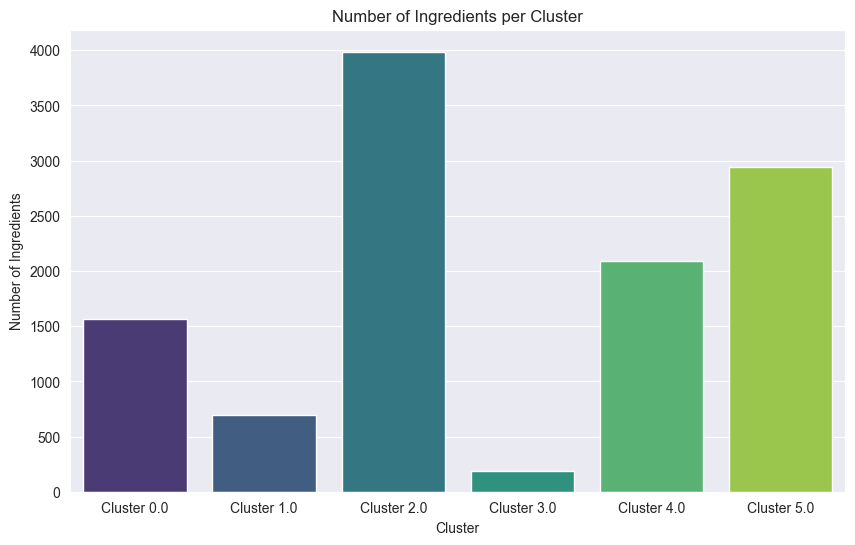

In [18]:
cluster_counts = cluster_summary['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Ingredients')
plt.title('Number of Ingredients per Cluster')
plt.xticks(ticks=range(len(cluster_counts)), labels=[f'Cluster {i}' for i in cluster_counts.index])
plt.show()

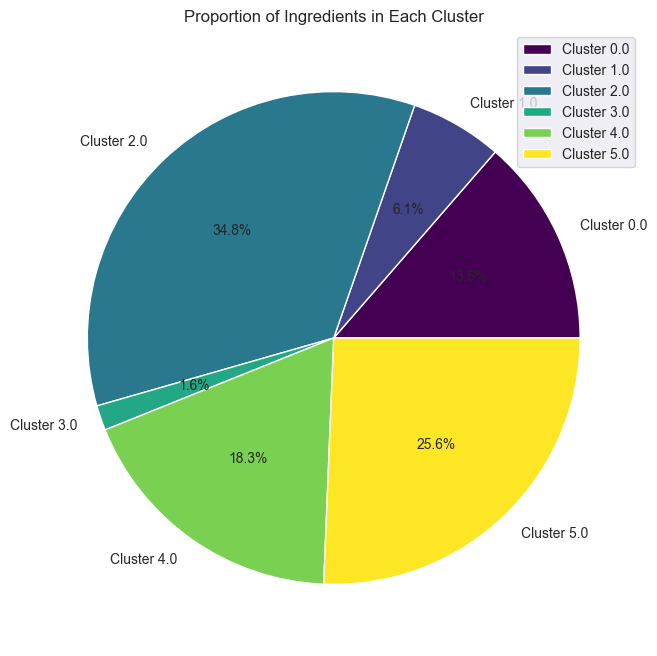

In [19]:
plt.figure(figsize=(8, 8))
cluster_counts.plot(kind='pie', autopct='%1.1f%%', cmap='viridis', legend=True, labels=[f'Cluster {i}' for i in cluster_counts.index])
plt.title('Proportion of Ingredients in Each Cluster')
plt.ylabel('')  # Remove the y-label for clarity
plt.show()

C:\Users\Mila\AppData\Local\Temp\ipykernel_5956\4244023251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=substitute_counts.index, y=substitute_counts.values, palette='plasma')


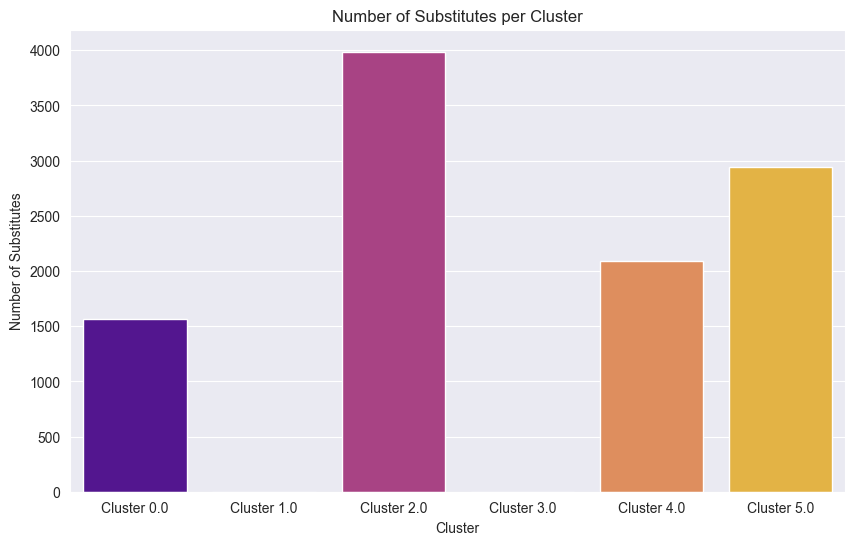

In [20]:
substitute_counts = cluster_summary['substitute'].notna().groupby(cluster_summary['cluster']).sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=substitute_counts.index, y=substitute_counts.values, palette='plasma')
plt.xlabel('Cluster')
plt.ylabel('Number of Substitutes')
plt.title('Number of Substitutes per Cluster')
plt.xticks(ticks=range(len(substitute_counts)), labels=[f'Cluster {i}' for i in substitute_counts.index])
plt.show()